In [242]:
import numpy as np
import matplotlib.pyplot as plt

In [291]:
eps = 1e-4
Nt = 300
Nx = 300
plotLimNt = 15

In [292]:
def calc_border_t0(t):
    return(1/(15-14*t)**3)

def calc_border_t1(t):
    return((64)/(15-14*t)**3)

def calc_border_0x(x):
    return(((1+x)**6)/3375)

def orig_func(x,t):
    return(((1+x)**6)/(15 - 14*t)**3)

In [293]:
def create_net(Nx=Nt,Nt=Nx):
    x = np.linspace(0,1,Nx)
    t = np.linspace(0,1,Nt)
    
    U_net = np.zeros(shape = (Nt,Nx))
    
    U_orig = np.zeros(shape = (Nt,Nx))
    
    for i in range(Nx):
        for j in range(Nt):
            U_orig[j,i] = orig_func(x[i],t[j])
            
    for i in range(Nx):
        U_net[0,i] = calc_border_0x(x[i]) 
        
    for i in range(Nt):
        U_net[i,0] = calc_border_t0(t[i])
    
    for i in range(Nt):
        U_net[i, Nx-1] = calc_border_t1(t[i])
        
    net = []
    for i in range(Nx):
        for j in range(Nt):
            net.append([t[j],x[i]])
    return U_net,U_orig, x, t, np.array(net)

In [294]:
def solve_TMA(known_layer,unknown_layer, original_known_layer,t,h):
    a = [unknown_layer[0]**(1/3)]
    for i in range(1,len(known_layer)-1):
        a.append(((known_layer[i+1])**(1/3) + (known_layer[i])**(1/3))/2)
    a.append(0)
    
    c = [0]
    for i in range(1,len(known_layer)-1):
        c.append(((known_layer[i])**(1/3) + (known_layer[i-1])**(1/3))/2)
    c.append(unknown_layer[-1]**(1/3))
        
    d = [0]
    for i in range(1,len(x)-1):
        d.append(-((original_known_layer[i] /t *h**2)))
    d.append(0)
    
    b = [-unknown_layer[0]**(1/3) - 6*h*unknown_layer[0]**(1/3)]
    for i in range(1,len(x)-1):
        b.append( - h**2 / t - 1/2*(known_layer[i+1])**(1/3) - (known_layer[i])**(1/3) -1/2*(known_layer[i-1])**(1/3))
    b.append(-unknown_layer[-1]**(1/3) - 3*h*unknown_layer[-1]**(1/3))
    
    alpha = [-a[0]/b[0]]
    beta = [d[0]/b[0]]
    
    for i in range(1,len(known_layer)):
        alpha.append(-a[i]/(b[i] + c[i]*alpha[i-1]))
        beta.append((d[i] - c[i]*beta[i-1])/(b[i] + c[i]*alpha[i-1]))

    U_L = (d[-1] - c[-1]*beta[-2])/(b[-1] + c[-1]*alpha[-2])
    U_L = unknown_layer[-1]

    solution = [U_L]
    for i in range(len(x),1,-1):
        solution.append(alpha[i-2]*solution[len(known_layer)-i] + beta[i-2])
        
    solution.reverse()
    solution[0] = unknown_layer[0]

    return(np.array(solution))

In [295]:
def solve_net(U_net):
    shapeT = U_net.shape[0]
    shapeX = U_net.shape[1]
    
    t = 1/shapeT
    h = 1/shapeX
    
    for i in range(shapeT-1):
        known_layer = U_net[i]
        unknown_layer = U_net[i+1]
        original_known_layer = U_net[i]
        
        unknown_layer = solve_TMA(known_layer,unknown_layer, original_known_layer,t,h)
        
        j = 0
        
        while(max(np.abs((known_layer-unknown_layer)/unknown_layer)) > eps):
            known_layer = unknown_layer
            unknown_layer = solve_TMA(known_layer,unknown_layer, original_known_layer,t,h)
            j += 1
        U_net[i+1] = unknown_layer
        if(shapeT <= plotLimNt):
            print('TMA used', format(j),'times')
            print(U_net[i+1])
            fig = plt.figure(figsize = (3,3))
            plt.imshow(U_net, extent=(-0, 1,0, 1), origin='lower',  cmap = 'cool')
            plt.xlabel('x')
            plt.ylabel('t')
            plt.colorbar()
            plt.show()
        
            

In [296]:
U_net, U_orig, x, t, net = create_net(Nt=Nt,Nx=Nx)

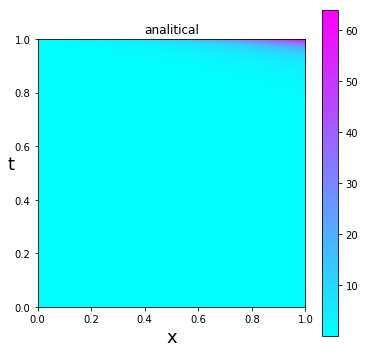

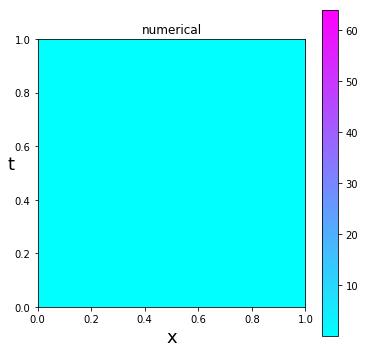

In [297]:
fig = plt.figure(figsize = (6,6))
plt.imshow(U_orig, extent=(-0, 1,0, 1), origin='lower', vmax=U_orig.max(), vmin=U_orig.min(), cmap = 'cool')
plt.colorbar()
plt.title('analitical')
plt.xlabel('x', fontsize=18)
plt.ylabel('t', fontsize=18, rotation = 0)
plt.show()

fig = plt.figure(figsize = (6,6))
plt.imshow(U_net, extent=(-0, 1,0, 1), origin='lower', vmax=U_orig.max(), vmin=U_orig.min(), cmap = 'cool')
plt.colorbar()
plt.title('numerical')
plt.xlabel('x', fontsize=18)
plt.ylabel('t',  fontsize=18, rotation=0)
plt.show()

In [298]:
solve_net(U_net)

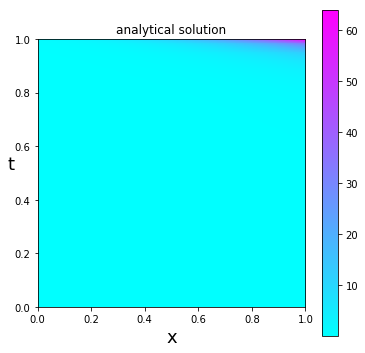

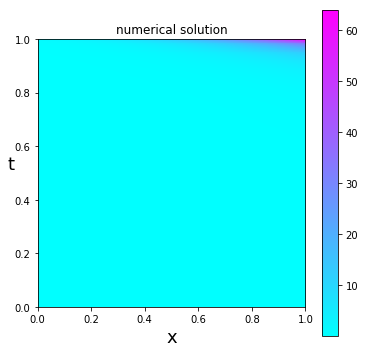

In [299]:
fig = plt.figure(figsize = (6,6))
plt.imshow(U_orig, extent=(-0, 1,0, 1), origin='lower', vmax=U_orig.max(), vmin=U_orig.min(), cmap = 'cool')
plt.colorbar()
plt.title('analytical solution')
plt.xlabel('x', fontsize=18)
plt.ylabel('t',  fontsize=18, rotation=0)
plt.show()

fig = plt.figure(figsize = (6,6))
plt.imshow(U_net, extent=(-0, 1,0, 1), origin='lower', vmax=U_orig.max(), vmin=U_orig.min(), cmap = 'cool')
plt.colorbar()
plt.title('numerical solution')
plt.xlabel('x', fontsize=18)
plt.ylabel('t',  fontsize=18, rotation=0)
plt.show()

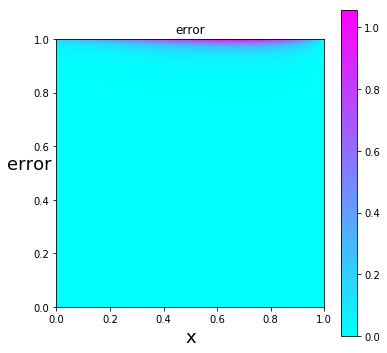

In [300]:
fig = plt.figure(figsize = (6,6))
plt.imshow(np.abs(U_net - U_orig), extent=(-0, 1,0, 1), origin='lower', cmap = 'cool')
plt.colorbar()
plt.title('error')
plt.xlabel('x', fontsize=18)
plt.ylabel('error',  fontsize=18, rotation=0)
plt.show()

In [301]:
np.abs(U_net - U_orig).max()

1.0572126708547316